In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

# Authenticate
kagglehub.login()

In [14]:
# Download latest version
path = kagglehub.dataset_download("narayananpp/indoor-robot-navigation-dataset-irnd")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/narayananpp/indoor-robot-navigation-dataset-irnd/versions/1


In [ ]:
json_files_path = "/root/.cache/kagglehub/datasets/narayananpp/indoor-robot-navigation-dataset-irnd/versions/1/outputs"
data_frames = []

for json_file in os.listdir(json_files_path):
  if json_file.endswith('.json'):
    print("Json file name: ", json_file)
    file_path = os.path.join(json_files_path, json_file)
    with open(file_path, 'r') as f:
      data = json.load(f)
      df = pd.json_normalize(data)
      data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

print(combined_df.head())

**Checking null-NaN values for inplacing with mean value**

In [21]:
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=True)



num_records    1
data           0
dtype: int64


<ipython-input-21-5b623b7b268a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean(), inplace=True)


**Find Mean for X and Y position of robot-AMR**

In [35]:

x_positions = [entry['pose']['x'] for entry in data['data']]
y_positions = [entry['pose']['y'] for entry in data['data']]

df = pd.DataFrame({'position_x': x_positions, 'position_y': y_positions})

print(df.head())

mean_x_position = df['position_x'].mean()
mean_y_position = df['position_y'].mean()

print(mean_x_position, mean_y_position)

   position_x  position_y
0     -1.4927      0.2481
1     -1.4892      0.2486
2     -1.4876      0.2506
3     -1.4896      0.2473
4     -1.4917      0.2484
-0.591035064935065 -0.04747012987012987


**Plotting robot position via matplotlib**

In [37]:
all_positions = pd.DataFrame(columns=['position_x', 'position_y'])

for json_file in os.listdir(json_files_path):
  if json_file.endswith('.json'):
    file_path = os.path.join(json_files_path, json_file)
    with open(file_path, 'r') as f:
      data = json.load(f)

    x_positions = [entry['pose']['x'] for entry in data['data']]
    y_positions = [entry['pose']['y'] for entry in data['data']]

    temp_df = pd.DataFrame({'position_x': x_positions, 'position_y': y_positions})

    all_positions = pd.concat([all_positions, temp_df], ignore_index=True)

print(all_positions.head())

<ipython-input-37-af9994a31ffb>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_positions = pd.concat([all_positions, temp_df], ignore_index=True)


   position_x  position_y
0      1.3913     -2.5780
1      1.3885     -2.5787
2      1.3878     -2.5786
3      1.3911     -2.5787
4      1.3915     -2.5787


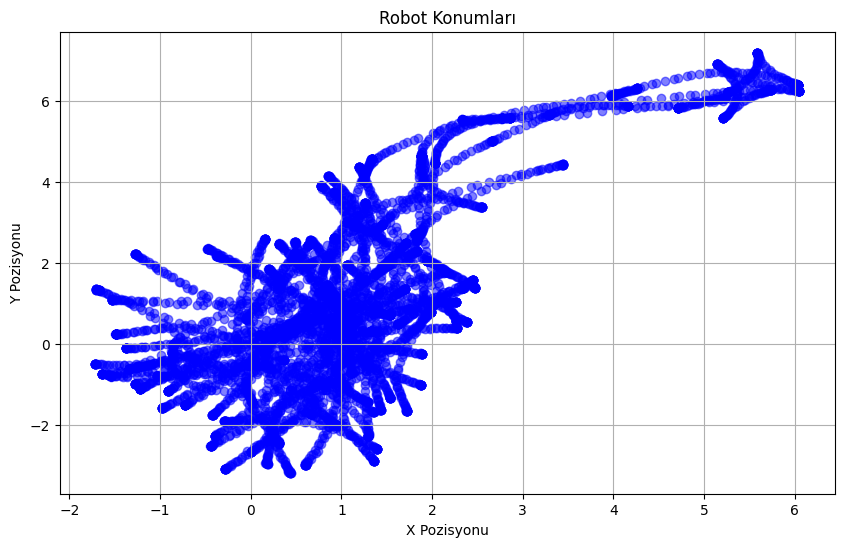

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(all_positions['position_x'], all_positions['position_y'], c='blue', alpha=0.5)
plt.title('Robot Konumları')
plt.xlabel('X Pozisyonu')
plt.ylabel('Y Pozisyonu')
plt.grid(True)
plt.show()